# Random Survival Forest (RSF)

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("~/Metabric/Data.csv")

In [2]:
data2.head()

,Mixture,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,...,Nottingham.prog.ind,PgR,Tumor.Size,Tumor.Stage,Lym.nodes.positive,RFSurvival,RFStatus,PAM50CL,Age,Cellularity
0,MB.0362,0.0,0.001666,0.001131,0.210700,0.0,0.016915,0.000926,0.005229,0.006589,...,4.036,Positive,18.0,2.0,1.0,46.41,1.0,LumA,52.79,High
1,MB.0346,0.0,0.003289,0.000000,0.051879,0.0,0.000000,0.000000,0.003398,0.024772,...,6.032,Negative,16.0,2.0,5.0,20.16,1.0,Her2,32.61,High
2,MB.0386,0.0,0.009385,0.047657,0.190845,0.0,0.001727,0.000000,0.005864,0.048940,...,6.030,Positive,15.0,3.0,8.0,121.09,1.0,LumA,66.83,Moderate
3,MB.0574,0.0,0.002752,0.000086,0.176506,0.0,0.000252,0.000000,0.001514,0.014069,...,5.042,Positive,21.0,2.0,1.0,9.84,1.0,LumA,71.21,High
4,MB.0185,0.0,0.011018,0.000000,0.168635,0.0,0.003078,0.003700,0.000000,0.011817,...,5.100,Positive,50.0,2.0,NaN,35.72,1.0,LumB,76.84,Moderate


In [3]:
data=  pd.DataFrame(data.drop(['Tumor.Stage','PAM50CL', 'Nottingham.prog.ind'], axis=1))  
data=data.dropna(axis=0) 

(1764, 40)

In [4]:
# Mapping dictionaries
mappings = {
    'HER2': {'Positive': 1, 'Negative': 0},
    'PgR': {'Positive': 1, 'Negative': 0},
    'ER': {'Positive': 1, 'Negative': 0},
    'Cellularity': {'Low': 1, 'Moderate': 2, 'High': 3}
}

# Replace values in columns using the mappings
for column, mapping in mappings.items():
    data[column] = data[column].replace(mapping)

# Convert categorical column 'PAM50' to dummy variables
data = pd.get_dummies(data, columns=['PAM50'])


# Preprocessing 

In [6]:
import seaborn as sns
from sklearn import set_config
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM

In [7]:
set_config(display="text")  # displays text representation of estimators
sns.set_style("whitegrid")

In [8]:
X= pd.DataFrame(data.drop(['Mixture',   'RFSurvival',   'RFStatus'  ], axis=1))  
d3= pd.DataFrame(data.drop(['Mixture',   'RFSurvival',   'RFStatus'  ], axis=1))  
y=  data[['RFStatus','RFSurvival']]

In [9]:
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.StandardScaler().fit(X).transform(X), columns =d3.columns)
X.shape
X.head()

,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,GenMod1,...,PgR,Tumor.Size,Lym.nodes.positive,Age,Cellularity,PAM50_Basal,PAM50_Her2,PAM50_LumA,PAM50_LumB,PAM50_Normal
0,-0.240249,-0.516887,-0.409623,0.606237,-0.279513,1.078028,-0.511583,0.417053,-0.855290,0.201101,...,0.953463,-0.548884,-0.252540,-0.630026,0.874699,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
1,-0.240249,-0.326461,-0.443483,-0.989886,-0.279513,-0.567284,-0.622712,0.051459,0.312454,-0.103742,...,-1.048809,-0.678931,0.711704,-2.178924,0.874699,-0.461741,2.495898,-0.715240,-0.599178,-0.301511
2,-0.240249,0.388537,0.983750,0.406695,-0.279513,-0.399258,-0.622712,0.544000,1.864571,0.881041,...,0.953463,-0.743955,1.434887,0.447601,-0.606078,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
3,-0.240249,-0.389463,-0.440916,0.262595,-0.279513,-0.542771,-0.622712,-0.324862,-0.374897,-0.980525,...,0.953463,-0.353813,-0.252540,0.783784,0.874699,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
4,-0.240249,-0.229412,0.705109,0.057752,-0.279513,0.338184,0.008489,0.032664,-0.721298,0.721458,...,0.953463,-0.223766,-0.493601,-0.017529,0.874699,-0.461741,-0.400657,1.398132,-0.599178,-0.301511


In [10]:
X.shape
y.shape

(1764, 2)

In [11]:
n_censored = y.shape[0] - y["RFStatus"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

59.2% of records are censored


In [12]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['RFStatus'], y['RFSurvival'], prediction)
    return result[0]

In [13]:
y=y.to_numpy()
aux=[(e1,e2) for e1,e2 in y]
ny=np.array(aux,dtype=[('RFStatus','?'),('RFSurvival','<f8')])

In [14]:
#   Import necessary ML packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(X,ny,test_size=0.3333,random_state=10)#

In [15]:
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators

In [18]:
from numpy import mean
from numpy import std

rsf = RandomSurvivalForest(n_jobs=-1,
                           random_state=0)

scores_rsf={} 
scores_rsf2={}
for i in range(1,10):
    n_estimators =i*50
    for j in range(1,5):
        min_samples_split=j*5
        for k in range(1,10):
            min_samples_leaf=k*3
            rsf.set_params(n_estimators=n_estimators,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
            for it in range(1,4):
                iter=it
                X_train,X_test,y_train,y_test=train_test_split(X,ny,test_size=0.3333,random_state=12*iter)
                rsf.fit(X_train, y_train)
                scores_rsf2[iter]=rsf.score(X_test, y_test)
             #   print(rsf.score(X_test, y_test), n_estimators,  min_samples_split,  min_samples_leaf, it)
                
            x,y=zip(*scores_rsf2.items())
            x=pd.DataFrame(x,columns=['Iteration'])
            y=pd.DataFrame(y,columns=['CIndex'])
            x=pd.concat([x,y],axis=1) 
            scores_rsf[n_estimators, min_samples_split,min_samples_leaf] = mean(x.CIndex) , std(x.CIndex)  #  rsf.score(X_test, y_test)
            
x,y=zip(*scores_rsf.items())
x=pd.DataFrame(x,columns=['n_estimators','min_samples_split','min_samples_leaf'])
y=pd.DataFrame(y,columns=['CIndex','SD'])
x=pd.concat([x,y],axis=1)
print(x[x.CIndex== x.CIndex.max()])

    n_estimators  min_samples_split  min_samples_leaf    CIndex        SD
5             50                  5                18  0.686045  0.010942
14            50                 10                18  0.686045  0.010942
23            50                 15                18  0.686045  0.010942
32            50                 20                18  0.686045  0.010942


In [19]:
from numpy import mean
from numpy import std
scores_rsf2={}

rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=20,
                           min_samples_leaf=18,
                           n_jobs=-1,
                           random_state=0)

for it in range(1,3):
    iter=it
    X_train,X_test,y_train,y_test=train_test_split(X,ny,test_size=0.3333,random_state=12*iter)
    rsf.fit(X_train,y_train)
    scores_rsf2[iter]=rsf.score(X_test,y_test) 
 #   print(rsf.score(X_test, y_test),  it)

x,y=zip(*scores_rsf2.items())
x=pd.DataFrame(x,columns=['Iteration'])
y=pd.DataFrame(y,columns=['CIndex'])
x=pd.concat([x,y],axis=1) 
print(mean(x.CIndex),std(x.CIndex)) 

0.6968695454592401 1
0.6902083635269066 2
0.6935389544930733 0.0033305909661667243


# SHAP

In [23]:
import shap

C:\Users\younesa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
rsf.fit(X,ny)  

explainer=shap.Explainer(rsf.predict,X,feature_names=d3.columns)
shaps = explainer(X)

Permutation explainer: 1765it [2:08:18,  4.37s/it]                            


In [25]:
shapvalues=pd.DataFrame(shaps.values,columns =shaps.feature_names)

In [27]:
shapvalues.to_csv('~/METABRIC/SHAP RSF.csv') 

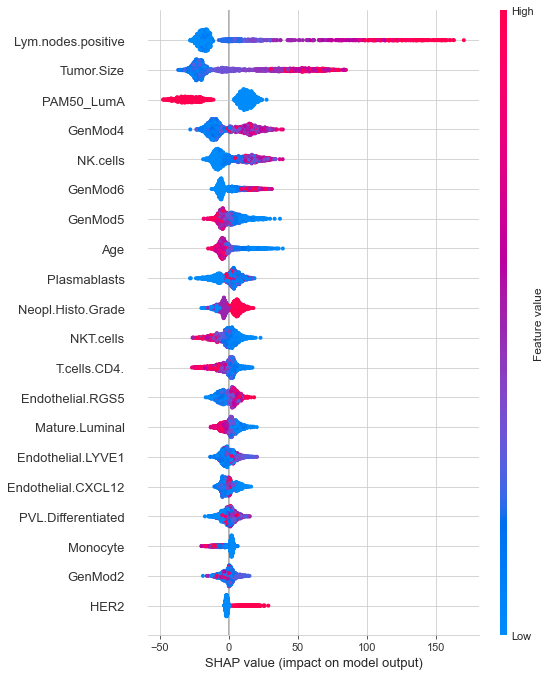

In [28]:
shap.summary_plot(shaps,feature_names=X.columns)

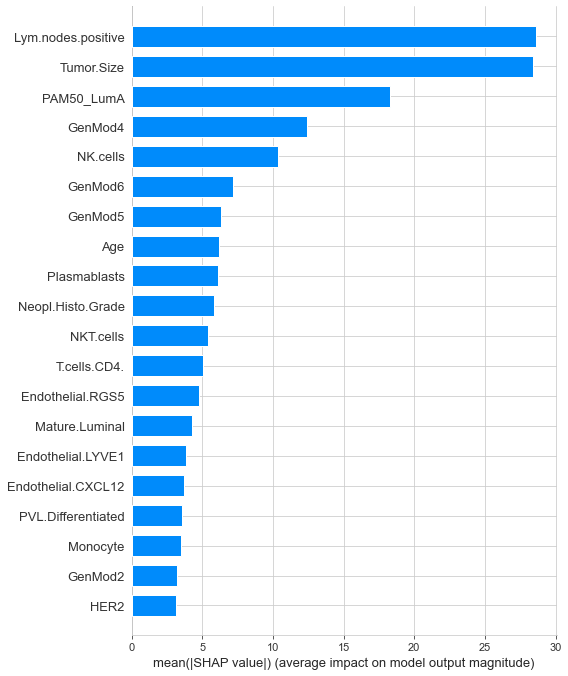

In [29]:
shap.summary_plot(shapvalues,X,feature_names=d3.columns,plot_type="bar")